# Investigating Netflix Movies Project

https://app.datacamp.com/learn/projects/investigating_netflix/guided/Python


**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [3]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

netflix_df = pd.read_csv('netflix_data.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [4]:
# remove 'tv shows'

netflix_subset = netflix_df[netflix_df['type'] == 'Movie']

# new df with selected columns

netflix_movies = netflix_subset[['title', 'country', 'genre', 'release_year', 'duration']]
netflix_movies.head(10)

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95
7,187,United States,Dramas,1997,119
8,706,India,Horror Movies,2019,118
9,1920,India,Horror Movies,2008,143
10,1922,United States,Dramas,2017,103
13,"2,215",Thailand,Documentaries,2018,89


In [27]:
# filter movies shorter than 60 minutes into new df

#short_movies = netflix_movies[netflix_movies['duration'] < 60]


# Filter for durations shorter than 60 minutes
short_movies = netflix_movies[netflix_movies.duration < 60]
                              
short_movies.head(10)

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


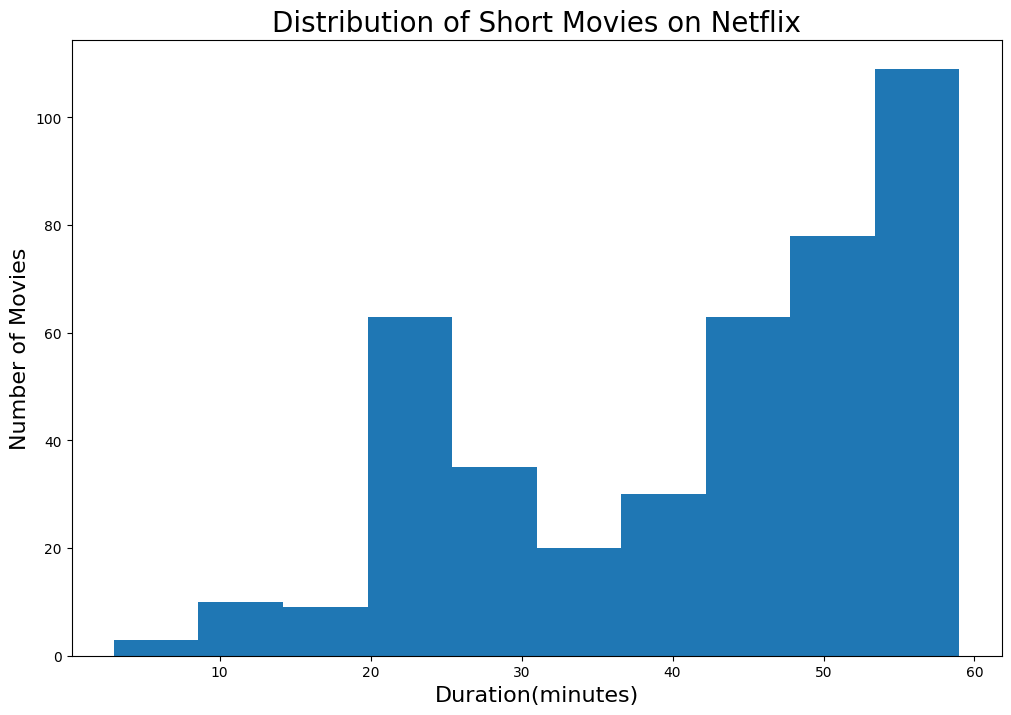

In [28]:
plt.figure(figsize=(12,8))
plt.hist(short_movies['duration'])
plt.title('Distribution of Short Movies on Netflix', fontsize=20)
plt.xlabel('Duration(minutes)', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16)
plt.show()

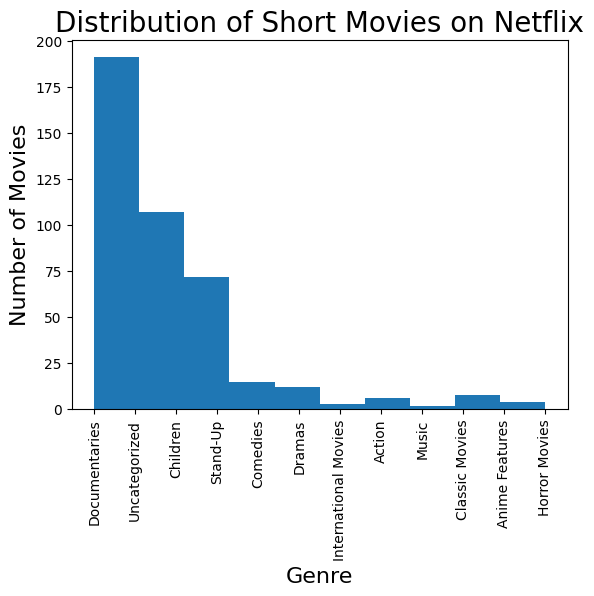

In [29]:
plt.hist(short_movies['genre'])
plt.title('Distribution of Short Movies on Netflix', fontsize=20)
plt.xlabel('Genre', fontsize=16, )
plt.ylabel('Number of Movies', fontsize=16)
plt.xticks(rotation='vertical')  # Add this line to rotate the x-axis labels
plt.show()

In [30]:
colours = []  # Create an empty list

for i in range(len(netflix_movies)):
    if netflix_movies['genre'].iloc[i] == 'Documentaries':
        colours.append('red')
    elif netflix_movies['genre'].iloc[i] == 'Children':
        colours.append('orange')
    elif netflix_movies['genre'].iloc[i] == 'Stand-Up':
        colours.append('yellow')
    else:
        colours.append('grey')

        


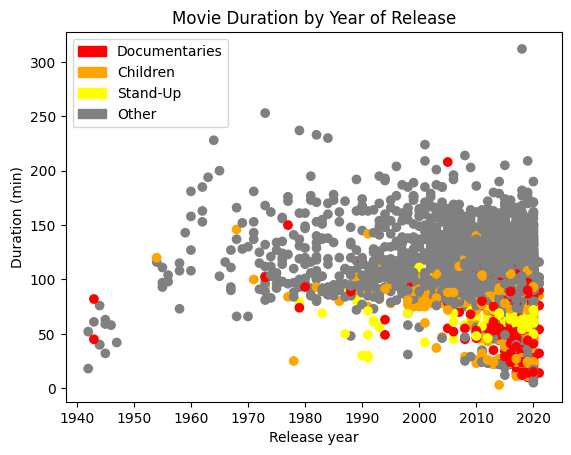

In [31]:
import matplotlib.patches as mpatches
# Define a dictionary to map genres to colours
colour_dict = {'Documentaries': 'red', 'Children': 'orange', 'Stand-Up': 'yellow', 'Other': 'grey'}

# Initialize a figure object
fig = plt.figure()

# Create a scatter plot of duration using the colours list
plt.scatter(y=netflix_movies['duration'], x=netflix_movies['release_year'], c=colours)

# Create legend
patches = [mpatches.Patch(color=v, label=k) for k, v in colour_dict.items()]
plt.legend(handles=patches)

# Add labels and title
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')

# Show the plot
plt.show()

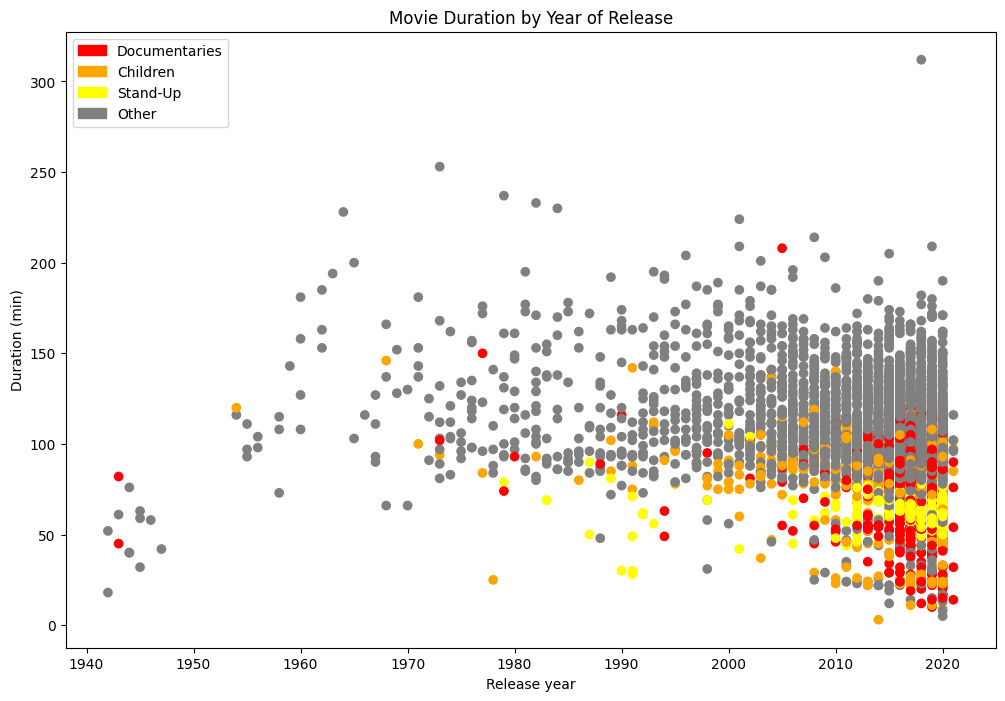

In [34]:
# alternative method avoiding for loop

# Create a copy of the DataFrame - to avoid warning about changing existing DataFrame
netflix_movies = netflix_movies.copy()

# Define a dictionary to map genres to colours
colour_dict = {'Documentaries': 'red', 'Children': 'orange', 'Stand-Up': 'yellow'}

# Map the colours to the genres
netflix_movies['colour'] = netflix_movies['genre'].map(colour_dict).fillna('grey')

# Initialize a figure object
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration using the colours list
plt.scatter(y=netflix_movies['duration'], x=netflix_movies['release_year'], c=netflix_movies['colour'])

# Create legend
patches = [mpatches.Patch(color=v, label=k) for k, v in colour_dict.items()]
patches.append(mpatches.Patch(color='grey', label='Other'))
plt.legend(handles=patches)

# Add labels and title
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')

# Show the plot
plt.show()